In [1]:
import numpy as np
import pandas as pd
import glob
from os.path import splitext, basename
from scipy.stats import linregress
from operator import itemgetter

import matplotlib.pyplot as plt

# Purpose

The figure shows the increase of followers compared to the company/industry size (extrapolated by the sum of all the employees on LinkedIn) over time

In [2]:
df = pd.read_csv('../data/section_3/temp_datalab_records_linkedin_company.csv')
df['as_of_date'] = pd.to_datetime(df.as_of_date)
df = df.dropna(subset=['industry'])

/anaconda3/envs/tdi/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
def replace_and(x):
    """
    if & or &amp; in value, replace it with /
    """
    replace_list = ['&amp;','/amp;','&']
    for i in replace_list:
        if i in x:
            y = x.replace(i, '/')
            break
        else:
            y = x
    return y

In [4]:
replace_and('Leisure, Travel &amp; Tourism')

'Leisure, Travel / Tourism'

In [5]:
df['industry'] = df.industry.apply(lambda x: replace_and(x))

# Testing on one industry

Increase of followers for companies in Investment Banking industry

In [8]:
company = 'Investment Banking'
df_test = df[df.industry == company]

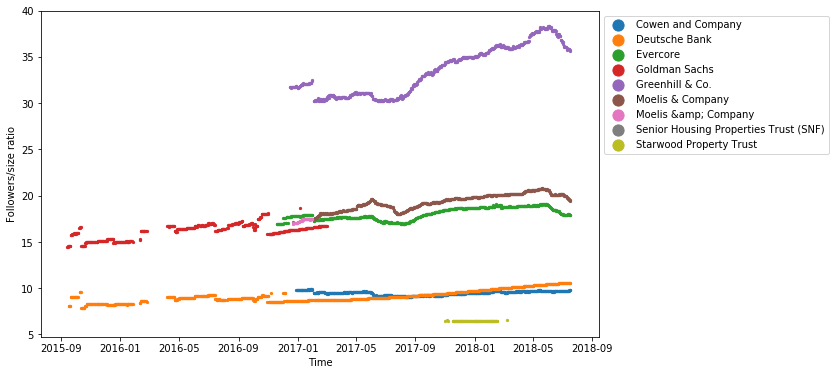

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
for c, data in df_test.groupby('company_name'):
    ax.scatter(x=data.as_of_date, y=data.followers_count/data.employees_on_platform, label=c, s=5)
ax.legend(bbox_to_anchor=(1., 1.), markerscale=5)

ax.set_ylabel('Followers/size ratio')
ax.set_xlabel('Time')
plt.savefig('../result/followers_size_over_time_{}.png'.format(company), dpi=300, transparent=True, bbox_inches='tight')

# Increase of followers for all industries

In [196]:
df = df[df.employees_on_platform!=0]
df['followers_to_size'] = df.followers_count/df.employees_on_platform

(0, 600)

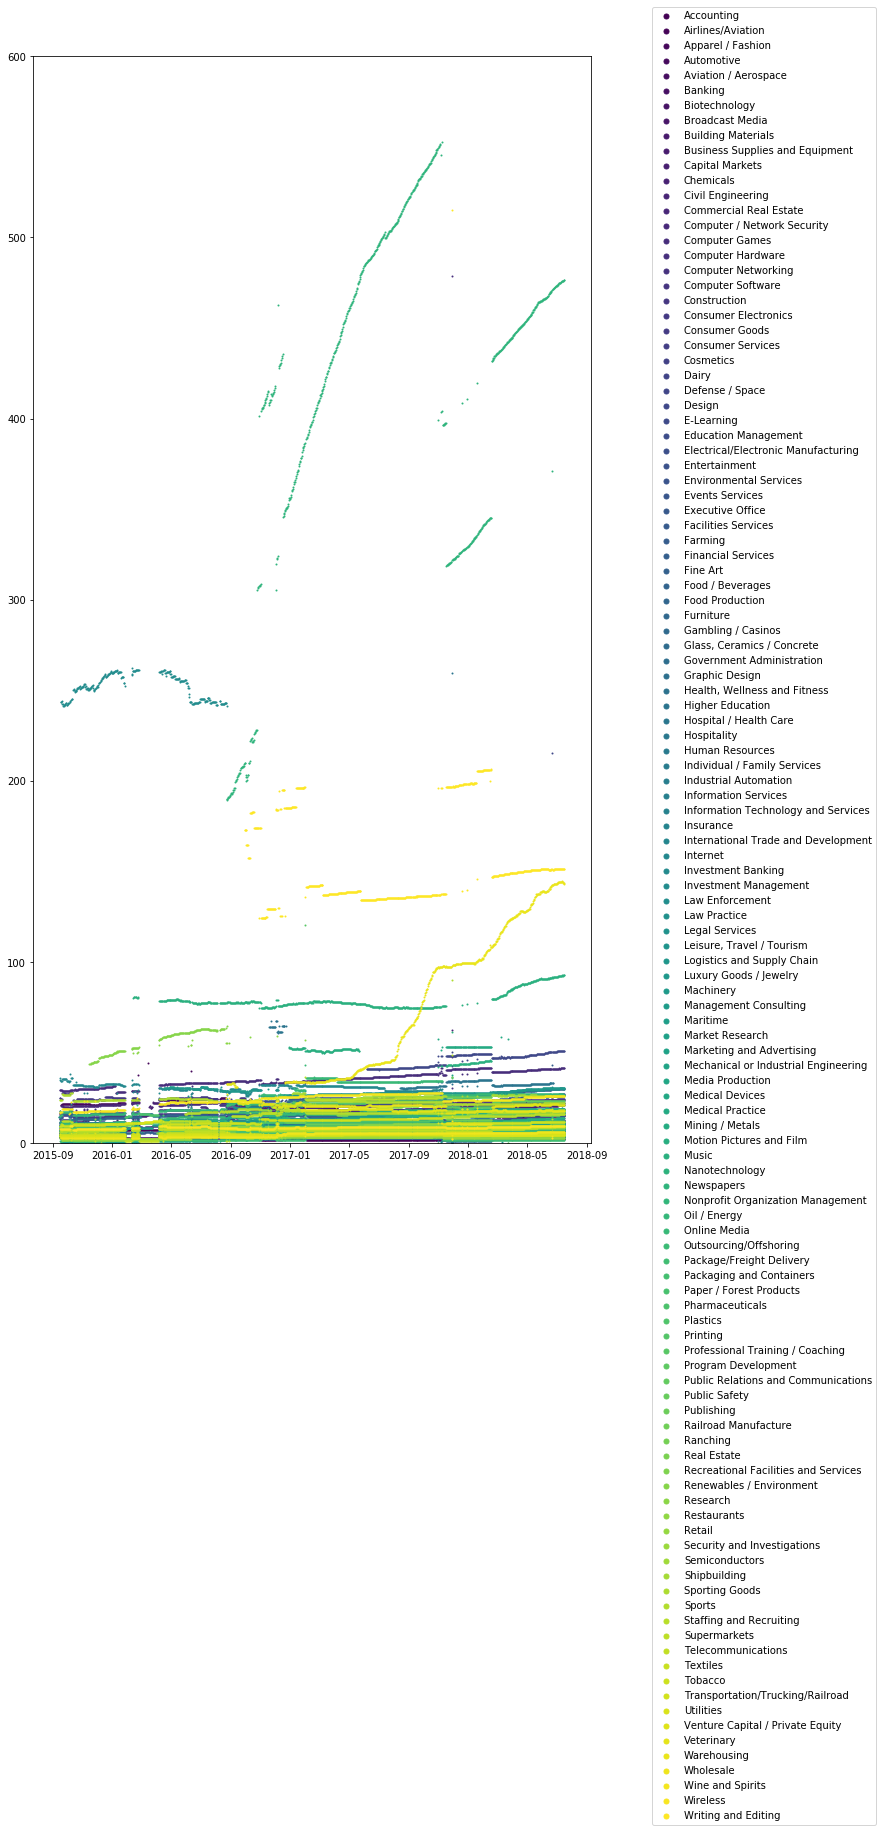

In [197]:
fig, ax = plt.subplots(figsize=(10,20))
cmap =  plt.cm.get_cmap('viridis')
color_list = cmap(np.linspace(0, 1, len(df.industry.unique())))
i = 0
follower_increase = []
for industry, data in df.groupby('industry'):
    industry_sum = data.groupby('as_of_date')[['followers_count', 'employees_on_platform']].sum()
    x = industry_sum.index.values
    y = industry_sum.followers_count/industry_sum.employees_on_platform
    a,b, r_value, p_value, std_err = linregress(pd.Series(x-x[0]).dt.days, y)
    ax.scatter(x=x, y=y, label=industry, color=color_list[i], s=1)
    i += 1
    follower_increase.append((industry,a))
    
ax.legend(bbox_to_anchor=(1.1, 1.05), markerscale=5)
ax.set_ylim([0, 600])

# Companies in order of decreasing to increasing followers

In [198]:
for industry, slope in sorted(follower_increase, key=itemgetter(1)):
    print('{}: {:.4f}'.format(industry, slope))



Investment Management: -0.2966
Motion Pictures and Film: -0.0653
Renewables / Environment: -0.0425
Program Development: -0.0334
Public Relations and Communications: -0.0128
Veterinary: -0.0107
Executive Office: -0.0097
Legal Services: -0.0089
Shipbuilding: -0.0087
Apparel / Fashion: -0.0087
Professional Training / Coaching: -0.0075
Hospitality: -0.0049
Venture Capital / Private Equity: -0.0046
Music: -0.0046
Broadcast Media: -0.0045
Internet: -0.0042
Nonprofit Organization Management: -0.0038
Real Estate: -0.0037
E-Learning: -0.0033
Logistics and Supply Chain: -0.0030
Consumer Electronics: -0.0028
Sporting Goods: -0.0026
Investment Banking: -0.0021
Building Materials: -0.0020
Events Services: -0.0019
Dairy: -0.0016
Business Supplies and Equipment: -0.0016
Packaging and Containers: -0.0014
Mechanical or Industrial Engineering: -0.0014
Restaurants: -0.0011
Oil / Energy: -0.0009
Outsourcing/Offshoring: -0.0009
Utilities: -0.0007
Media Production: -0.0004
Higher Education: -0.0004
Law Enfo

# Conclusion

Most companies followers do not change over time, but there are few, like News papers, Warehousing that are gaining followers in order of magnitude faster (using linear regression) than other industries